<a href="https://colab.research.google.com/github/santosjhony12/treinamento_IA/blob/main/drought_detect_rede_neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q kagglehub

import kagglehub

#baixa o dataset do kaggle
path = kagglehub.dataset_download('vijayaragulvr/drought-prediction-dataset')

import os

entries = os.listdir(path)

for entry in entries:
  print(entry)

100%|██████████| 6.18M/6.18M [00:00<00:00, 59.8MB/s]

Extracting files...


stage_4_drought_dataset.csv


In [3]:
import pandas as pd

wbc = pd.read_csv(path + '/stage_4_drought_dataset.csv')
wbc.head(5)

,row_id,RH2M,T2M_MAX,T2M_MIN,WS2M,T2M,ALLSKY_SFC_SW_DWN,PRECTOTCORR,spei,label,lat_sin,lat_cos,lon_sin,lon_cos,month_sin,month_cos
0,4001,74.508022,22.595385,15.381648,3.820110,18.487033,14.064505,0.540000,-0.509704,0,0.457874,0.889017,-0.229200,0.973379,0.5,0.866025
1,4002,80.544945,31.117473,23.957802,1.437912,27.347692,17.805495,8.071538,1.879026,0,-0.229200,0.973379,-0.900698,0.434445,0.5,0.866025
2,4000,74.840220,16.972857,15.164396,5.609231,16.079560,8.197473,1.922637,-0.714408,0,0.639439,0.768842,0.074108,0.997250,0.5,0.866025
3,4004,92.207473,23.940549,18.537253,0.783736,20.751648,13.920659,10.336813,0.578710,0,0.082808,0.996566,-0.971342,0.237686,0.5,0.866025
4,4003,22.693516,36.564725,18.226044,3.269011,27.594286,30.404176,0.259890,0.420534,0,-0.442289,0.896873,0.321439,0.946930,0.5,0.866025


In [4]:
wbc.describe()

,row_id,RH2M,T2M_MAX,T2M_MIN,WS2M,T2M,ALLSKY_SFC_SW_DWN,PRECTOTCORR,spei,label,lat_sin,lat_cos,lon_sin,lon_cos,month_sin,month_cos
count,115985.000000,115985.000000,115985.000000,115985.000000,115985.000000,115985.000000,115985.000000,115985.000000,115985.000000,115985.000000,115985.000000,115985.000000,115985.000000,115985.000000,1.159850e+05,1.159850e+05
mean,61995.770919,62.622005,20.748500,9.956789,2.611353,15.065260,17.618862,1.619408,-0.786354,0.517308,0.363161,0.777317,0.091252,0.644590,-1.713161e-02,-2.993147e-02
std,33487.019578,23.992455,15.096759,13.120057,1.431301,13.861579,6.385317,2.086801,1.016155,0.499702,0.464974,0.218389,0.703173,0.285886,7.129519e-01,7.003705e-01
min,4000.000000,9.337692,-39.956593,-45.271099,0.000110,-42.670659,0.000000,0.000000,-7.704723,0.000000,-0.826590,0.108867,-0.999990,0.004363,-1.000000e+00,-1.000000e+00
25%,32996.000000,43.387363,12.509780,2.924725,1.780659,7.566703,14.364835,0.212967,-1.504392,0.000000,0.021815,0.659346,-0.746057,0.418660,-8.660254e-01,-8.660254e-01
50%,61992.000000,67.142747,25.565824,12.733846,2.724725,18.799560,18.469560,0.962527,-1.029018,1.000000,0.473320,0.854912,0.271440,0.678801,-2.449294e-16,-1.836970e-16
75%,91003.000000,83.337253,31.575824,20.529231,3.405275,25.638242,21.926813,2.188791,-0.131200,1.000000,0.746057,0.949699,0.728371,0.922201,8.660254e-01,5.000000e-01
max,119999.000000,99.878022,49.593736,32.935385,11.368242,40.564505,33.741978,47.679231,3.937162,1.000000,0.994056,0.999990,0.999990,0.999990,1.000000e+00,1.000000e+00


In [5]:
print(wbc.dtypes)

row_id                 int64
RH2M                 float64
T2M_MAX              float64
T2M_MIN              float64
WS2M                 float64
T2M                  float64
ALLSKY_SFC_SW_DWN    float64
PRECTOTCORR          float64
spei                 float64
label                  int64
lat_sin              float64
lat_cos              float64
lon_sin              float64
lon_cos              float64
month_sin            float64
month_cos            float64
dtype: object


In [6]:
# verifica se tem null
print(wbc.isnull().sum())

row_id               0
RH2M                 0
T2M_MAX              0
T2M_MIN              0
WS2M                 0
T2M                  0
ALLSKY_SFC_SW_DWN    0
PRECTOTCORR          0
spei                 0
label                0
lat_sin              0
lat_cos              0
lon_sin              0
lon_cos              0
month_sin            0
month_cos            0
dtype: int64


In [7]:
print("Quantidade de registros: " + str(len(wbc)))
print(wbc.nunique())

Quantidade de registros: 115985
row_id               115985
RH2M                 106233
T2M_MAX               99490
T2M_MIN               98028
WS2M                  42845
T2M                   97951
ALLSKY_SFC_SW_DWN     81104
PRECTOTCORR           41353
spei                 115326
label                     2
lat_sin                 280
lat_cos                 168
lon_sin                 360
lon_cos                 180
month_sin                11
month_cos                11
dtype: int64


In [8]:
# Vou utilizar todos os atributos com exceção do row_id e do label que é o quero descobrir
x = wbc.drop(['row_id', 'label', 'spei'], axis=1)

# O que eu quero descobrir
y = wbc['label']


In [9]:
# retirando 20% para testar

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(92788, 13)
(23197, 13)
(92788,)
(23197,)


In [10]:
# Treinando com 80% dos dados
from sklearn.neural_network import MLPClassifier

# instanciando um classificador tipo rede neural no máximo 2000 épocas
model = MLPClassifier(random_state=1, max_iter=2000)

# treina o modelo
model.fit(x_train, y_train)

MLPClassifier(max_iter=2000, random_state=1)

Matriz de Confusão
Acurácia: 0.62
Precisão para Maligno: 0.65
Precisão média ponderada: 0.62
Recall (M): 0.58
Recall médio ponderado: 0.62
F1 (M): 0.61
F1 médio ponderado: 0.62


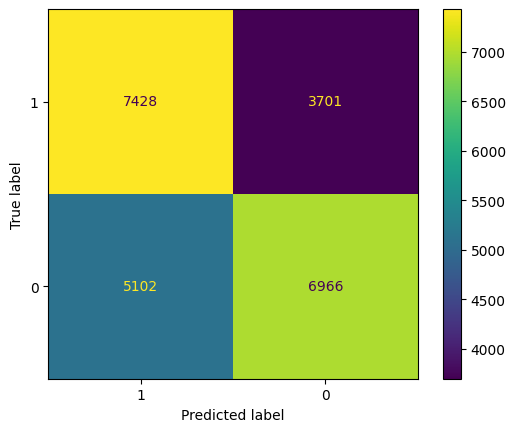

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Predição
y_pred = model.predict(x_test)

# Matriz de confusão
print("Matriz de Confusão")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_test.unique())
disp.plot()

# Acurácia
acc = accuracy_score(y_test, y_pred)
print("Acurácia: {:.2f}".format(acc))

# Precisão para Maligno
pre = precision_score(y_true= y_test, y_pred = y_pred, pos_label = 1)
print("Precisão para Maligno: {:.2f}".format(pre))

# Precisão média ponderada
prem = precision_score(y_true= y_test, y_pred = y_pred, average = 'weighted')
print("Precisão média ponderada: {:.2f}".format(prem))

# Recall para Maligno
rec = recall_score(y_true = y_test, y_pred = y_pred, pos_label = 1)
print("Recall (M): {:.2f}".format(rec))

# Recall médio ponderado
recm = recall_score(y_true = y_test, y_pred = y_pred, average = "weighted")
print("Recall médio ponderado: {:.2f}".format(recm))

# F1 para Maligno
f1 = f1_score(y_true = y_test, y_pred = y_pred, pos_label = 1)
print("F1 (M): {:.2f}".format(f1))

# F1 médio ponderado
f1m = f1_score(y_true = y_test, y_pred = y_pred, average = "weighted")
print("F1 médio ponderado: {:.2f}".format(f1m))

In [12]:
# Padronizando os dados

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Treina apenas com os dados de treinamento
scaler.fit(x_train)

# Padroniza as colunas
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [13]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(random_state=1, max_iter=2000)

model.fit(X_train, y_train)

MLPClassifier(max_iter=2000, random_state=1)

Matriz de Confusão
Acurácia: 0.66
Precisão (M): 0.68
Precisão média ponderada: 0.66
Recall (M): 0.63
Recall médio ponderado: 0.66
F1 (M): 0.65
F1 médio ponderado: 0.66


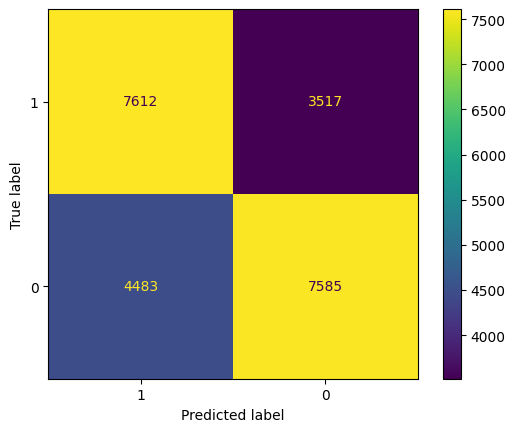

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Predição
y_pred = model.predict(X_test)

# Matriz de confusão
print('Matriz de Confusão')
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_test.unique())
disp.plot()

# Acurácia
acc = accuracy_score(y_test, y_pred)
print("Acurácia: {:.2f}".format(acc))

# Precisão para Maligno
pre = precision_score(y_true = y_test, y_pred = y_pred, pos_label = 1)
print("Precisão (M): {:.2f}".format(pre))

# Precisão média ponderada
prem = precision_score(y_true = y_test, y_pred = y_pred, average = "weighted")
print("Precisão média ponderada: {:.2f}".format(prem))

# Recall para Maligno
rec = recall_score(y_true = y_test, y_pred = y_pred, pos_label = 1)
print("Recall (M): {:.2f}".format(rec))

# Recall médio ponderado
recm = recall_score(y_true = y_test, y_pred = y_pred, average = "weighted")
print("Recall médio ponderado: {:.2f}".format(recm))

# F1 para Maligno
f1 = f1_score(y_true = y_test, y_pred = y_pred, pos_label = 1)
print("F1 (M): {:.2f}".format(f1))

# F1 médio ponderado
f1m = f1_score(y_true = y_test, y_pred = y_pred, average = "weighted")
print("F1 médio ponderado: {:.2f}".format(f1m))

In [15]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(random_state=1, max_iter=5000, hidden_layer_sizes=(100,100, 100), activation='relu', solver='adam', alpha=0.1, learning_rate='constant')

model.fit(X_train, y_train)

MLPClassifier(alpha=0.1, hidden_layer_sizes=(100, 100, 100), max_iter=5000,
              random_state=1)

Matriz de Confusão
Acurácia: 0.67
Precisão (M): 0.66
Precisão média ponderada: 0.67
Recall (M): 0.74
Recall médio ponderado: 0.67
F1 (M): 0.70
F1 médio ponderado: 0.67


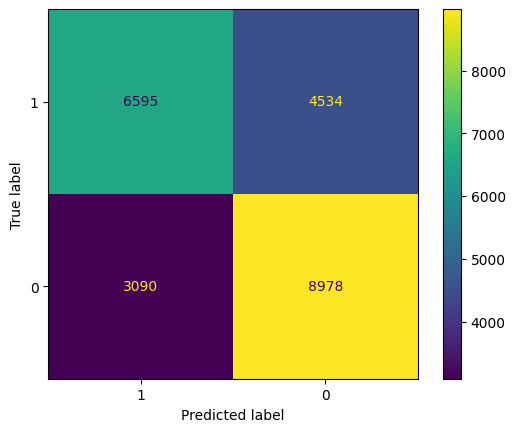

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Predição
y_pred = model.predict(X_test)

# Matriz de confusão
print('Matriz de Confusão')
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_test.unique())
disp.plot()

# Acurácia
acc = accuracy_score(y_test, y_pred)
print("Acurácia: {:.2f}".format(acc))

# Precisão para Maligno
pre = precision_score(y_true = y_test, y_pred = y_pred, pos_label = 1)
print("Precisão (M): {:.2f}".format(pre))

# Precisão média ponderada
prem = precision_score(y_true = y_test, y_pred = y_pred, average = "weighted")
print("Precisão média ponderada: {:.2f}".format(prem))

# Recall para Maligno
rec = recall_score(y_true = y_test, y_pred = y_pred, pos_label = 1)
print("Recall (M): {:.2f}".format(rec))

# Recall médio ponderado
recm = recall_score(y_true = y_test, y_pred = y_pred, average = "weighted")
print("Recall médio ponderado: {:.2f}".format(recm))

# F1 para Maligno
f1 = f1_score(y_true = y_test, y_pred = y_pred, pos_label = 1)
print("F1 (M): {:.2f}".format(f1))

# F1 médio ponderado
f1m = f1_score(y_true = y_test, y_pred = y_pred, average = "weighted")
print("F1 médio ponderado: {:.2f}".format(f1m))

In [17]:
X_sub = X_train[:1000]
y_sub = y_train[:1000]

from sklearn.model_selection import RandomizedSearchCV

# Define os parâmetros para o processo de tuning
parametros = {
    'hidden_layer_sizes': [(100,), (10,),(100, 10), (100,100,100)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# Cria o tuning com busca aleatória. Gera apenas 100 combinações e avalia com f1
tuning = RandomizedSearchCV(MLPClassifier(random_state=1, max_iter=5000), param_distributions = parametros, scoring = "accuracy", n_iter = 100, verbose = 3)

# Treina o modelo explorando os parâmetros
tuning.fit(X_sub, y_sub)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam;, score=0.575 total time=  24.7s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam;, score=0.510 total time=  27.5s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam;, score=0.565 total time=  26.0s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam;, score=0.600 total time=  27.8s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam;, score=0.570 total time=  26.8s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate=constant, solver=adam;, score=0.570 total time=  13.6s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 100, 100), learning_rate=c

RandomizedSearchCV(estimator=MLPClassifier(max_iter=5000, random_state=1),
                   n_iter=100,
                   param_distributions={'activation': ['logistic', 'tanh',
                                                       'relu'],
                                        'alpha': [0.0001, 0.001, 0.01],
                                        'hidden_layer_sizes': [(100,), (10,),
                                                               (100, 10),
                                                               (100, 100, 100)],
                                        'learning_rate': ['constant',
                                                          'adaptive'],
                                        'solver': ['sgd', 'adam']},
                   scoring='accuracy', verbose=3)

In [18]:
# Melhores parâmetros encontrados
print('Melhores parâmetros:\n', tuning.best_params_)

Melhores parâmetros:
 {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (100, 100, 100), 'alpha': 0.001, 'activation': 'relu'}


In [19]:
from sklearn.neural_network import MLPClassifier

best_params = tuning.best_params_

model_final = MLPClassifier(
    random_state=1,
    max_iter=5000,
    **best_params
)

model_final.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=(100, 100, 100), max_iter=5000,
              random_state=1)

Matriz de Confusão
Acurácia: 0.69
Precisão (M): 0.69
Precisão média ponderada: 0.69
Recall (M): 0.74
Recall médio ponderado: 0.69
F1 (M): 0.71
F1 médio ponderado: 0.69


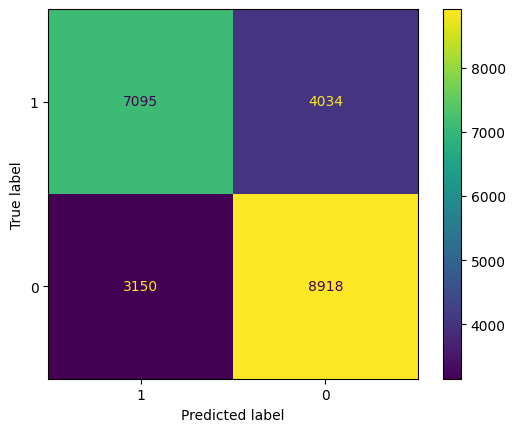

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Predição
y_pred = model_final.predict(X_test)

# Matriz de confusão
print('Matriz de Confusão')
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_test.unique())
disp.plot()

# Acurácia
acc = accuracy_score(y_test, y_pred)
print("Acurácia: {:.2f}".format(acc))

# Precisão para Maligno
pre = precision_score(y_true = y_test, y_pred = y_pred, pos_label = 1)
print("Precisão (M): {:.2f}".format(pre))

# Precisão média ponderada
prem = precision_score(y_true = y_test, y_pred = y_pred, average = "weighted")
print("Precisão média ponderada: {:.2f}".format(prem))

# Recall para Maligno
rec = recall_score(y_true = y_test, y_pred = y_pred, pos_label = 1)
print("Recall (M): {:.2f}".format(rec))

# Recall médio ponderado
recm = recall_score(y_true = y_test, y_pred = y_pred, average = "weighted")
print("Recall médio ponderado: {:.2f}".format(recm))

# F1 para Maligno
f1 = f1_score(y_true = y_test, y_pred = y_pred, pos_label = 1)
print("F1 (M): {:.2f}".format(f1))

# F1 médio ponderado
f1m = f1_score(y_true = y_test, y_pred = y_pred, average = "weighted")
print("F1 médio ponderado: {:.2f}".format(f1m))